In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # Dynamically allocate GPU memory
    except RuntimeError as e:
        print(e)

2024-10-04 18:55:31.697007: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-04 18:55:31.719536: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-04 18:55:32.976243: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-04 18:55:32.987236: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open 

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
import pandas as pd
import numpy as np

chat = pd.read_csv('freecodecamp_casual_chatroom.csv', usecols = ['fromUser.id', 'text'])

chat = chat[chat['fromUser.id'] != '55b977f00fc9f982beab7883']

chat.head()

,fromUser.id,text
0,546fd99cdb8155e6700d6ec8,no legumes either
1,54a47e0cdb8155e6700e486e,That bullet proof coffee sounds insane.
2,54a47e0cdb8155e6700e486e,That guy has huge eyes.
3,546fd99cdb8155e6700d6ec8,@janetwalters008 It is. but it works. some peo...
4,54a44bbbdb8155e6700e47de,They guy that came up with the idea is kind of...


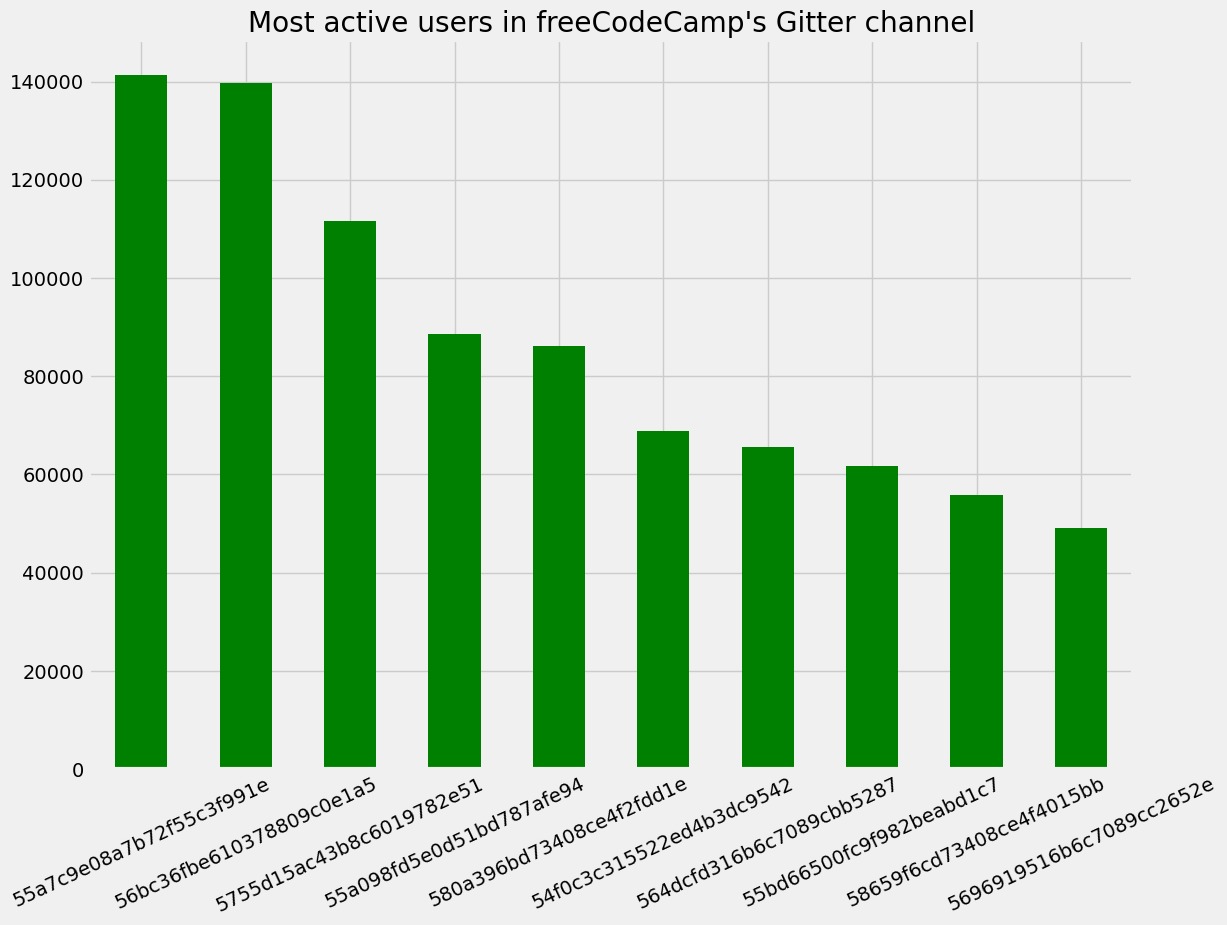

In [5]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

f, g = plt.subplots(figsize=(12, 9))
chat['fromUser.id'].value_counts().head(10).plot.bar(color='green')
g.set_xticklabels(g.get_xticklabels(), rotation=25)
plt.title('Most active users in freeCodeCamp\'s Gitter channel')
plt.show(g)

In [6]:
chat[chat['fromUser.id'] == '55a7c9e08a7b72f55c3f991e'].text.head(10)

224937    Hello... I heard about Free Code Camp via Life...
224977    So, just going through the prescribed steps (h...
225004    Looking for some idea on the average amount of...
225053    ok, I found the documentation (I'm new) on the...
225099    at what point does pair coding come into the p...
247053    do some amount of BASH here as well. Have to s...
247090    With all of the various frameworks (even some ...
247105    I'd like to see more variety in design as well...
247114    does the sameness (not specifically Bootstrap,...
247126    I've found that compiling a list (your own + l...
Name: text, dtype: object

In [7]:
user = chat[chat['fromUser.id'] == '55a7c9e08a7b72f55c3f991e'].text

n_messages = len(user)
n_chars = len(' '.join(map(str, user)))

print('55a7c9e08a7b72f55c3f991e accounts for %d messages' % n_messages)
print('Their messages add up to %d characters' % n_chars)

55a7c9e08a7b72f55c3f991e accounts for 141362 messages
Their messages add up to 7407104 characters


In [8]:
sample_size = int(len(user) * 0.2)

user = user[:sample_size]
user = ' '.join(map(str, user)).lower()

user[:100]

'hello... i heard about free code camp via lifehacker (i think: it was a feedly- feed) so, just going'

In [9]:
chars = sorted(list(set(user)))

print('Count of unique characters (i.e, features):', len(chars))

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

Count of unique characters (i.e, features): 149


In [10]:
maxlen = 40
step = 3
sentences = []
next_chars = []

for i in range(0, len(user) - maxlen, step):
    sentences.append(user[i: i + maxlen])
    next_chars.append(user[i + maxlen])

print('Number of sequences:', len(sentences), '\n')
print(sentences[:10], '\n')
print(next_chars[:10])

Number of sequences: 490695 

['hello... i heard about free code camp vi', 'lo... i heard about free code camp via l', '.. i heard about free code camp via life', 'i heard about free code camp via lifehac', 'eard about free code camp via lifehacker', 'd about free code camp via lifehacker (i', 'bout free code camp via lifehacker (i th', 't free code camp via lifehacker (i think', 'ree code camp via lifehacker (i think: i', ' code camp via lifehacker (i think: it w'] 

['a', 'i', 'h', 'k', ' ', ' ', 'i', ':', 't', 'a']


In [11]:
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool_)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.callbacks import LambdaCallback, ModelCheckpoint
import random
import sys
import io

In [13]:
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

2024-10-04 18:57:37.478170: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-04 18:57:37.478261: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-04 18:57:37.478293: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-04 18:57:37.478467: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-04 18:57:37.478730: I external/local_xla/xla/stream_executor

In [14]:
def sample(preds, temperature=1.0):

    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

def on_epoch_end(epoch, logs):

    if epoch + 1 == 1 or epoch + 1 == 15:
        print()
        print('===== Generating text after Epoch: %d' % epoch)
        start_index = random.randint(0, len(user) - maxlen - 1)
        for diversity in [0.2, 0.5, 1.0, 1.2]:
            print('===== diversity:', diversity)
            generated = ''
            sentence = user[start_index: start_index + maxlen]
            generated += sentence
            print('===== Generating with seed: \'' + sentence + '\'')
            sys.stdout.write(generated)
            for i in range(400):
                x_pred = np.zeros((1, maxlen, len(chars)))
                for t, char in enumerate(sentence):
                    x_pred[0, t, char_indices[char]] = 1.
                preds = model.predict(x_pred, verbose=0)[0]
                next_index = sample(preds, diversity)
                next_char = indices_char[next_index]
                generated += next_char
                sentence = sentence[1:] + next_char
                sys.stdout.write(next_char)
                sys.stdout.flush()
            print()
    else:
        print()
        print('===== Not generating text after Epoch: %d' % epoch)

generate_text = LambdaCallback(on_epoch_end=on_epoch_end)

In [15]:
from keras.models import load_model

filepath = 'weights.keras'
checkpoint = ModelCheckpoint(filepath,
                             monitor='loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

model = load_model('weights.keras')

with tf.device('/gpu:0'):
    model.fit(x, y,
              batch_size=128,
              epochs=15,
              verbose=2,
              callbacks=[generate_text, checkpoint])

ImportError: cannot import name 'load_model' from 'keras.models' (/home/shighton/miniconda3/envs/rapids-24.02/lib/python3.10/site-packages/keras/models/__init__.py)